# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

> Для того, чтобы результаты работы алгоритмов, опирающихся на случайные значения, были воссоздаваемы (например, train-test split, градиентный спуск, инициализация весов итд).





# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [10]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

#### 1.1

In [11]:
df_train.columns[df_train.isna().any(axis=0)]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [12]:
df_train.duplicated().sum()

985

#### 1.2

In [13]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

  Preparing metadata (setup.py) ... done


In [14]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(
    pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv'),
    title='Pandas Profiling Report'
)

In [15]:
profile_report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

> 1. 7% объектов задублированы, в 1.1% объектов есть пропуски в данных

> 2. Больше всего пропусков в столбце seats - 2.9%

> 3. Цена продажи заметно скоррелирована с годом и типом трансмиссии

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [16]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [17]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [18]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [19]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [20]:
compare = df_train.describe().loc[['mean', '50%']].merge(df_test.describe(), left_index=True, right_index=True, suffixes=('_test', '_train'))
compare.reindex(sorted(compare.columns), axis=1)

,km_driven_test,km_driven_train,seats_test,seats_train,selling_price_test,selling_price_train,year_test,year_train
mean,69584.615517,71393.341,5.419008,5.410805,639515.197171,617901.042,2013.818403,2013.681
50%,60000.000000,61500.000,5.000000,5.000000,450000.000000,434999.000,2015.000000,2014.000




> Значения очень близки, значит, тестовый датасет хорошо отражает распределение обучающего и наоборот



### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [21]:
df_train[df_train.columns[df_train.columns != 'selling_price']].duplicated().sum()

1159

In [22]:
df_train[df_train[df_train.columns[df_train.columns != 'selling_price']].duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [23]:
df_train.drop_duplicates(subset=df_train.columns[df_train.columns != 'selling_price'], inplace=True)

In [24]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [25]:
import re

In [26]:
def to_float(value):
  if pd.notna(value) and len(value.split()) == 2:
    return float(value.split()[0])

In [27]:
df_train.mileage = df_train.mileage.apply(to_float)
df_train.engine = df_train.engine.apply(to_float)
df_train.max_power = df_train.max_power.apply(to_float)

df_test.mileage = df_test.mileage.apply(to_float)
df_test.engine = df_test.engine.apply(to_float)
df_test.max_power = df_test.max_power.apply(to_float)

In [28]:
torque_val = re.compile(r'^(?P<value>[\d\.\,]+)')
max_torque_val = re.compile(r'.+\D(?P<value>\d{1,2}[\.,]?\d{3}).*$')

def get_torqe(value):
  if pd.notna(value):
    val = torque_val.search(value).groupdict()['value'].replace(',', '.')

    if 'kgm' in value.lower() and not 'nm' in value.lower():
      return float(val) * 10
    return float(val)

def get_max_torque_rpm(value):
  if pd.notna(value):
    val = max_torque_val.search(value)

    if val:
      return float(val.groupdict()['value'].replace(',', ''))

In [29]:
df_train.torque, df_train['max_torque_rpm'] = df_train.torque.apply(get_torqe), df_train.torque.apply(get_max_torque_rpm)

df_test.torque, df_test['max_torque_rpm'] = df_test.torque.apply(get_torqe), df_test.torque.apply(get_max_torque_rpm)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [30]:
reference_vals = df_train.select_dtypes(include='number').median()

In [31]:
df_train.fillna(reference_vals, inplace=True)
df_test.fillna(reference_vals, inplace=True)

In [32]:
df_train.isna().any(), df_test.isna().any()

(name              False
 year              False
 selling_price     False
 km_driven         False
 fuel              False
 seller_type       False
 transmission      False
 owner             False
 mileage           False
 engine            False
 max_power         False
 torque            False
 seats             False
 max_torque_rpm    False
 dtype: bool,
 name              False
 year              False
 selling_price     False
 km_driven         False
 fuel              False
 seller_type       False
 transmission      False
 owner             False
 mileage           False
 engine            False
 max_power         False
 torque            False
 seats             False
 max_torque_rpm    False
 dtype: bool)

> Почему стоит применять именно медиану? - Медиана устойчива к выбросам

> Как правильно считать медиану для заполнения? -
По тренировочным данным для train и test, так как, во-первых, распределение данных в датасетах должно быть похожим, а во-вторых, значения из тестовой выборки не должны участвовать в предобработке данных, так как это может привести к проливам

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [33]:
df_train.engine, df_train.seats = df_train.engine.apply(int), df_train.seats.apply(int)

df_test.engine, df_test.seats = df_test.engine.apply(int), df_test.seats.apply(int)

`Your answer here`

In [34]:
df_train.seats.unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])


> 1. seats может принимать ограниченное количество значений, причем не непрерывное (например, не может быть 3)

> 2. Вряд ли ожидается линейная зависимость цены от количества сидений - скорее количество сидений определяет разные категории машин


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [35]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.948422,175.690854,5.426712,3045.789041
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.577884,108.106906,0.982344,911.039323
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,48.000000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,112.000000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,161.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,204.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1900.000000,14.000000,21800.000000





> Значительных сдвигов не видно


> Медиана, минимум и максимум сдвинуться не могли, но остальные значения - да. Например, если бы болшая часть значений была занята пропусками, то первый и/или третий квантиль могли бы сравняться с медианой. Стандартное отклонение и среднее в любом случае затрагиваются заполнением пропусков



## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [36]:
import seaborn as sns

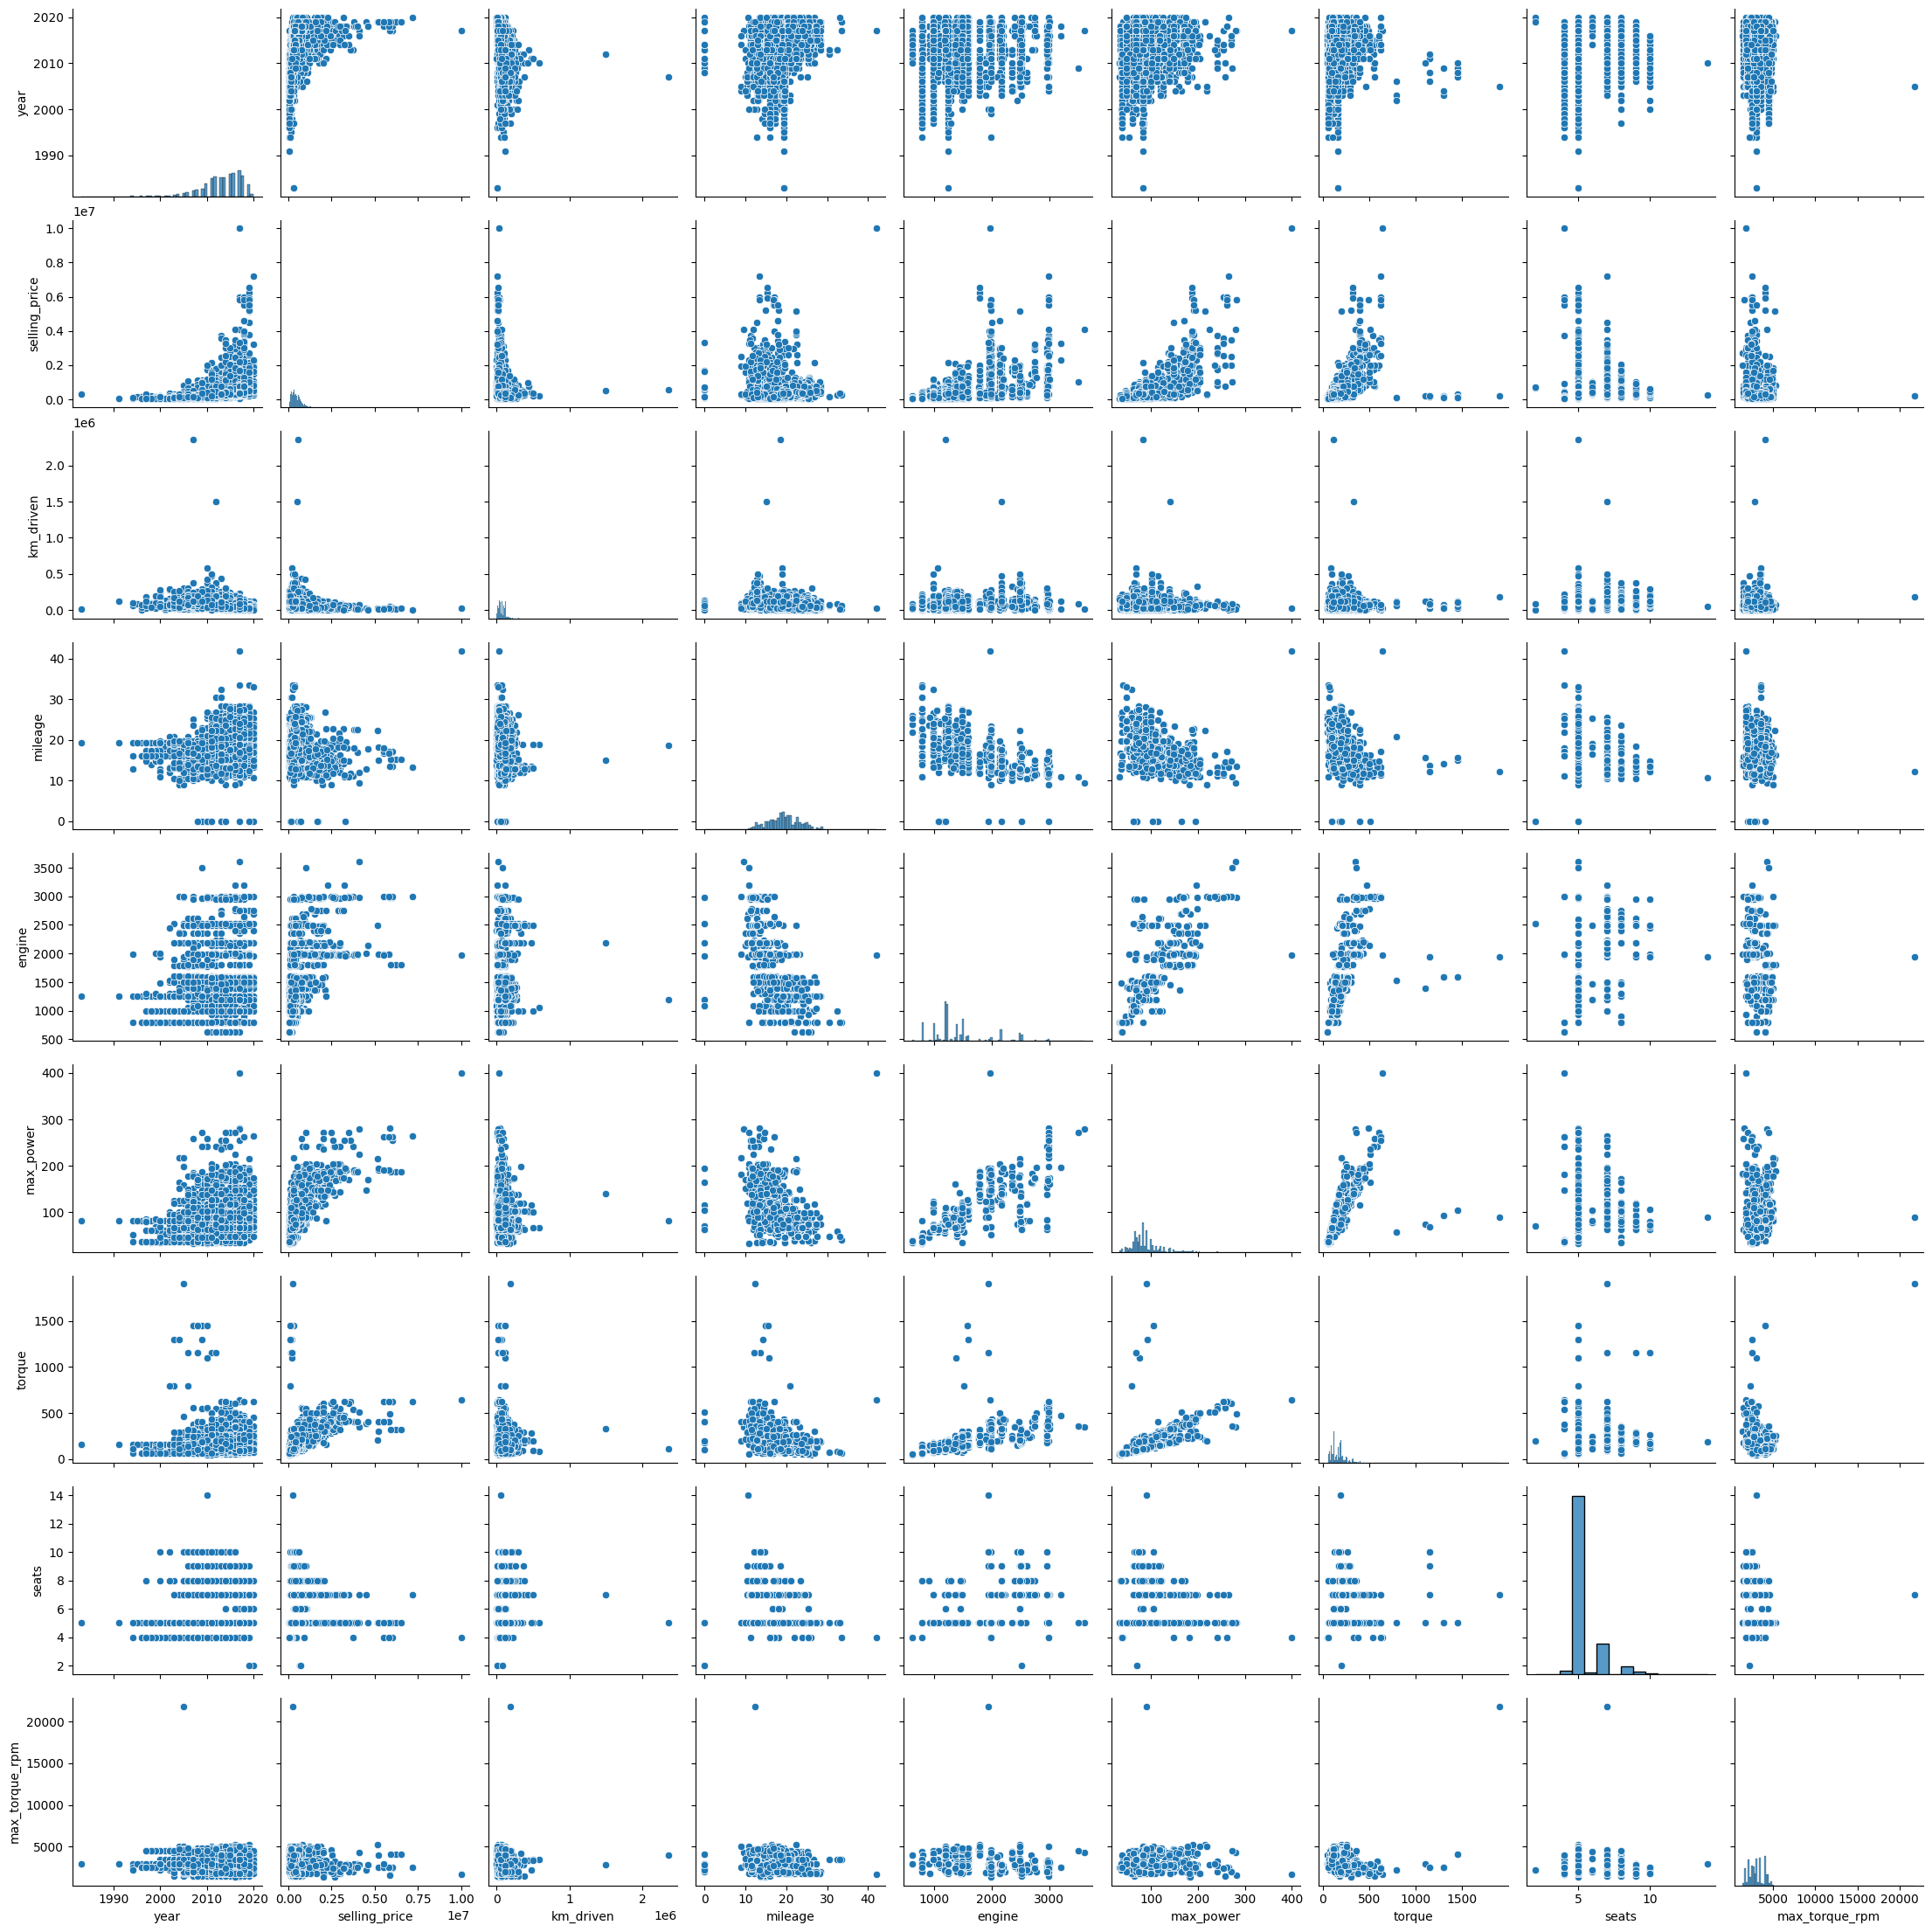

In [38]:
sns.pairplot(df_train)



> Можно ли предположить на основе распределений связь признаков с целевой переменной? - Да, заметна прямая корреляция с годом, мощностью, двигателем и моментом силы, обратная корреляция с пробегом.




> Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков? - Многие значения кореллируют с годом: чем новее машина, тем она чаще более мощная, с меньшим пробегом, с большим моментом силы. Двигатель кореллирует с мощностью и моментом силы.



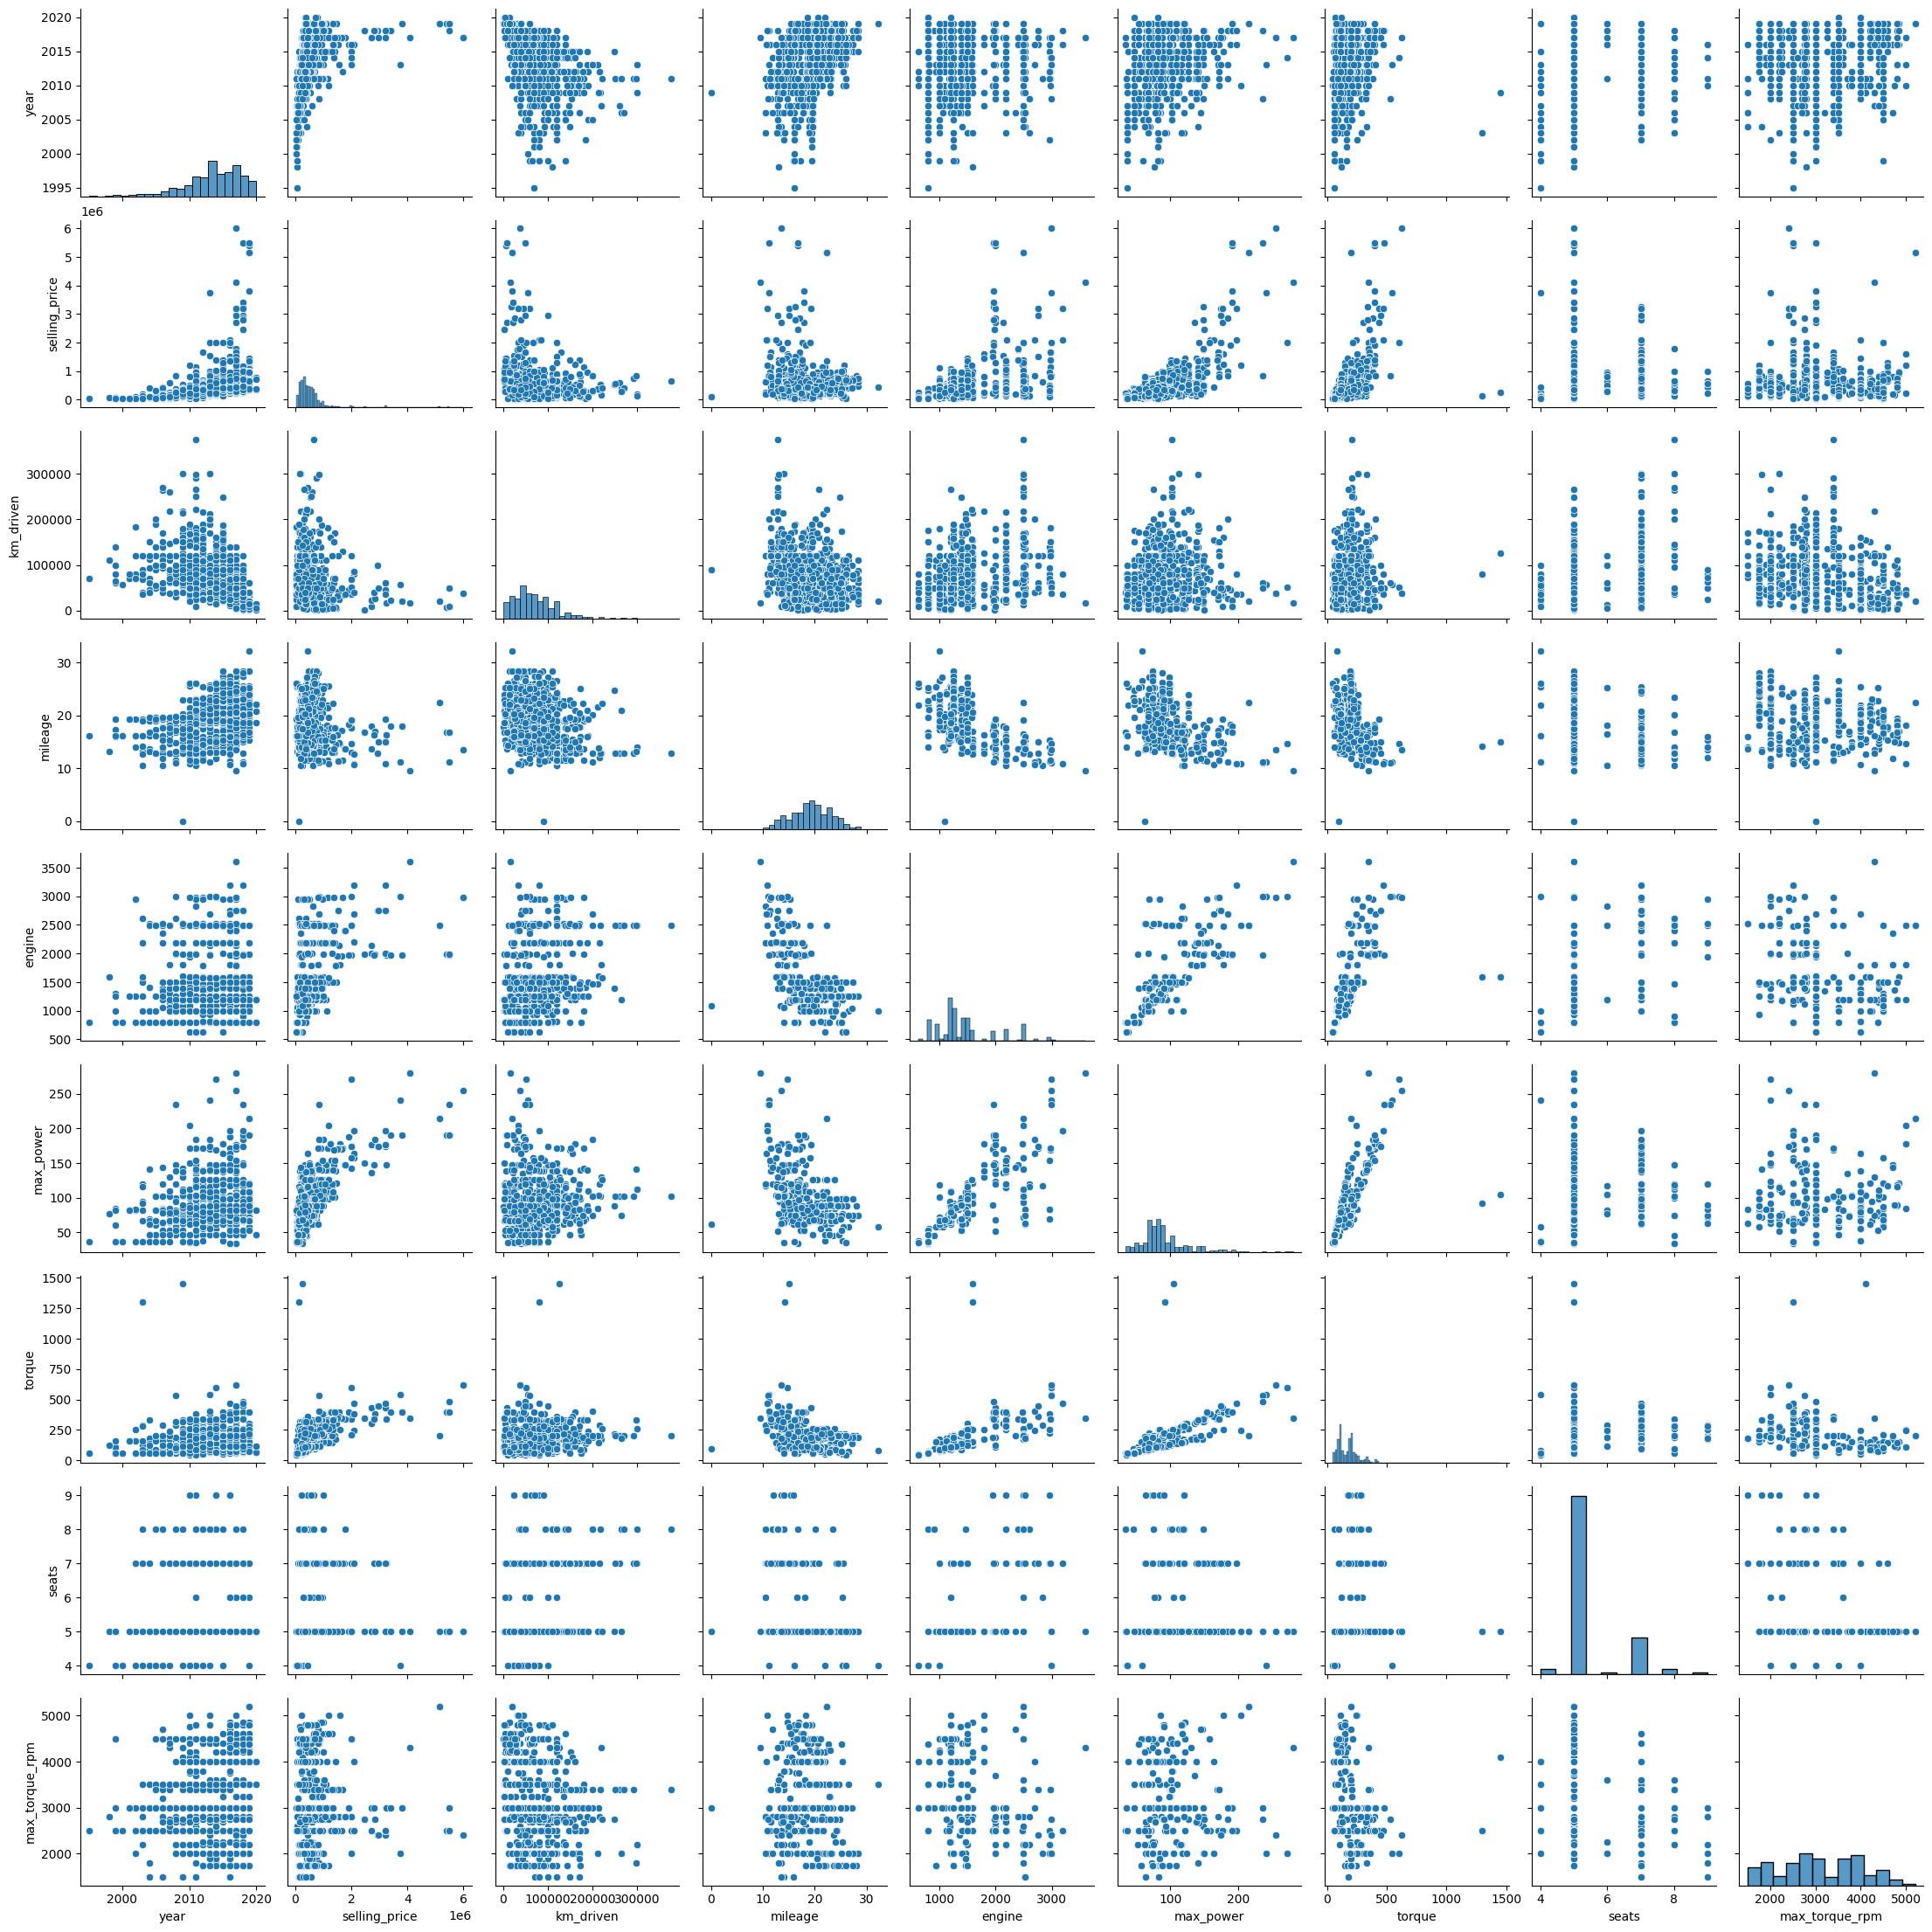

In [37]:
sns.pairplot(df_test)


> Похожими ли оказались совокупности при разделении на трейн и тест? - Да, зависимости в данных похожи



### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

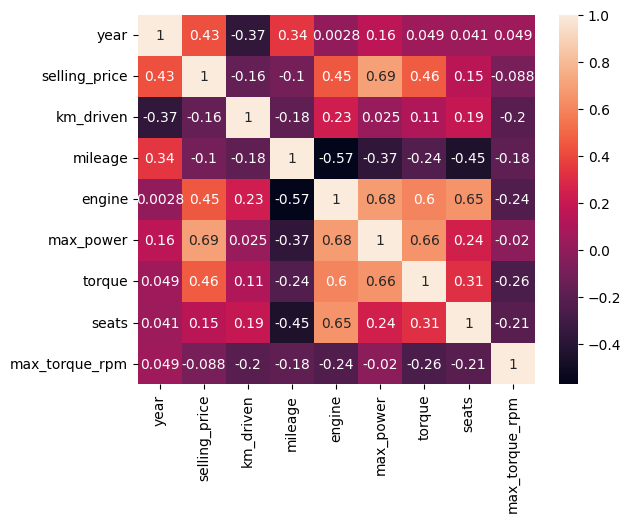

In [39]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

In [40]:
df_train.corr(numeric_only=True) == df_train.corr(numeric_only=True).abs().min().min()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,False,False,False,False,True,False,False,False,False
selling_price,False,False,False,False,False,False,False,False,False
km_driven,False,False,False,False,False,False,False,False,False
mileage,False,False,False,False,False,False,False,False,False
engine,True,False,False,False,False,False,False,False,False
max_power,False,False,False,False,False,False,False,False,False
torque,False,False,False,False,False,False,False,False,False
seats,False,False,False,False,False,False,False,False,False
max_torque_rpm,False,False,False,False,False,False,False,False,False


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?



> Год и двигатель


> Год и цена; цена и двигатель; цена и мощность; цена и момент силы; двигатель, мощность и момент силы; количество сидений и двигатель



> Да, так как между годом и километражом наблюдается отрицательная корреляция







### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [41]:
"""
Эта функция - это адаптированный код отсюда:
https://stackoverflow.com/questions/5284646/rank-items-in-an-array-using-python-numpy-without-sorting-array-twice
"""

def get_ranks(vals):
  rank = vals.argsort(axis=0).argsort(axis=0)

  unique, inverse = np.unique(rank, return_inverse = True, axis=0)

  unique_rank_sum = np.zeros_like(unique)
  np.add.at(unique_rank_sum, inverse, rank)
  unique_count = np.zeros_like(unique)
  np.add.at(unique_count, inverse, 1)

  unique_rank_mean = unique_rank_sum.astype(float) / unique_count

  return unique_rank_mean[inverse]

In [105]:
def spearman(df):
  ranks = get_ranks(df.select_dtypes(include='number').values)
  mean = ranks.mean(axis=0)
  vals = ranks - mean
  return (vals.T @ vals) / (vals ** 2).sum(axis=0)

In [124]:
np.allclose(spearman(df_train), df_train.corr('spearman', numeric_only=True).values.T, atol=0.2)

True

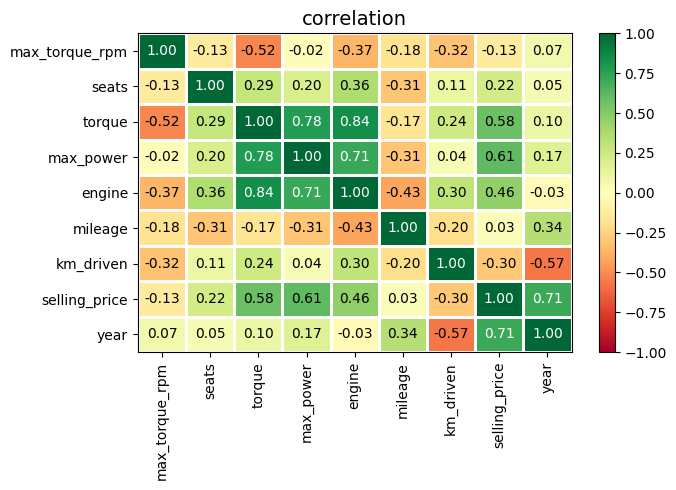

In [127]:
from phik.report import plot_correlation_matrix

plot_correlation_matrix(
    spearman(df_train),
    x_labels=df_train.select_dtypes(include='number').columns,
    y_labels=df_train.select_dtypes(include='number').columns
)


> Здесь прослеживаются те же зависимости, что и на предыдущей тепловой карте



### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [35]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [36]:
df_numeric_train = df_train.select_dtypes(include='number')

In [37]:
X_train = df_numeric_train[df_numeric_train.columns[df_numeric_train.columns != 'selling_price']]
y_train = df_numeric_train['selling_price']

In [38]:
assert X_train.shape == (5840, 8)

In [39]:
df_numeric_test = df_test.select_dtypes(include='number')

In [40]:
X_test = df_numeric_test[df_numeric_test.columns[df_numeric_test.columns != 'selling_price']]
y_test = df_numeric_test['selling_price']

In [41]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(f'R2: {r2_score(y_test, y_pred)}\nMSE: {MSE(y_test, y_pred)}')

R2: 0.6009366475145184
MSE: 229393010517.46484


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [43]:
def r2(y_true, y_pred):
    r2 = 1 - ((y_true - y_pred) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()

    return r2

In [44]:
r2_score(y_test, y_pred)==r2(y_test, y_pred)

True



> `((y_true - y_pred) ** 2).sum()` - Сумма квадратов отклонений предсказанных значений от истинных

> `((y_true - y_true.mean()) ** 2).sum()` - Сумма квадратов отклонений истинных значений от среднего

> По сути: в числителе MSE, в знаменателе дисперсия, $\frac{1}{n}$ сокращается



### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [45]:
# your code here

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

print(f'R2: {r2_score(y_test, y_pred)}\nMSE: {MSE(y_test, y_pred)}')

R2: 0.6009366475145215
MSE: 229393010517.46307


In [50]:
import pickle

In [52]:
with open('model.pkl', 'wb') as f:
  pickle.dump(linreg, f)

with open('scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
X_train.columns[abs(linreg.coef_).argmax()]

'max_power'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print(f'R2: {r2_score(y_test, y_pred)}\nMSE: {MSE(y_test, y_pred)}')

R2: 0.6009353668076722
MSE: 229393746704.33136


In [ ]:
lasso.coef_

array([165055.28478317, -48864.03135265,  -7860.39570237,  20743.4287032 ,
       331432.50358807,   6265.66584014, -29247.979822  , -59215.33612459])



> Не занулила, так как, скорее всего, сейчас параметров модели не так много, и они все вносят значительный вклад в предсказание



### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
# your code here

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [22]:
from fastapi import FastAPI
from pydantic import BaseModel, field_validator, computed_field, Field
from typing import List, Optional
from io import StringIO
import pandas as pd
import re
import pickle

app = FastAPI()
torque_val = re.compile(r'^(?P<value>[\d\.\,]+)')
max_torque_val = re.compile(r'.+\D(?P<value>\d{1,2}[\.,]?\d{3}).*$')

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

cols = [
    'year',
    'km_driven',
    'mileage',
    'engine',
    'max_power',
    'torque',
    'seats',
    'max_torque_rpm'
]


class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: float
    engine: float
    max_power: float
    torque_str: str = Field(validation_alias='torque')
    seats: float

    @field_validator('mileage', 'max_power', 'engine', mode='before')
    def to_float(value):
        if len(value.split()) == 2:
            return float(value.split()[0])

    @computed_field(repr=True, return_type=float)
    @property
    def torque(self) -> float:
        val = torque_val.search(self.torque_str).groupdict()['value'].replace(',', '.')

        if 'kgm' in self.torque_str.lower() and not 'nm' in self.torque_str.lower():
            return float(val) * 10
        return float(val)

    @computed_field(repr=True, return_type=float)
    @property
    def max_torque_rpm(self):
        val = max_torque_val.search(self.torque_str)
        if val:
            return float(val.groupdict()['value'].replace(',', ''))

    def selling_price(self) -> float:
        val = [self.dict()[col] for col in cols]
        pred = model.predict(scaler.transform([val]))
        return pred[0]

class Table(BaseModel):
    table: str


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return item.selling_price()


@app.post("/predict_items")
def predict_items(table: Table) -> str:
    df = pd.read_csv(StringIO(table.table))
    df['selling_price'] = [Item(**row).selling_price() for row in df.to_dict('records')]
    return df.to_csv()

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>